In [1]:
%config Completer.use_jedi = False
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex

from tqdm import tqdm

import sys
sys.path.append("/end/home/rh2310/morpho_repo/amplitude_method")
from utils import *

In [2]:
init_printing(use_latex='mathjax')#(use_latex=True)

#### Define a list of parameters

In [3]:
A, B, C = symbols('A, B, C', real=True, positive = True)

D_A, D_B = symbols('D_A, D_B', real=True, positive = True)

(b_A, b_B, b_C,
 V_A, V_B, V_C,
K_AB, K_AC, K_BA, K_BC,K_CA,  K_CB, K_CC,
μ_A, μ_B, μ_C) = symbols(
    'b_A, b_B, b_C, V_A, V_B, V_C, K_AB, K_AC, K_BA, K_BC,K_CA, K_CB, K_CC, mu_A, mu_B, mu_C', 
    real=True, positive = True)

k, n = symbols('k, n', integer=True)

> The PDEs are as follows

<h3><center>$
     \frac{\partial A}{\partial t} = b_A  +   V_A   \frac{1}{1+\left(\frac{K_{BA}}{B }\right)^{n}} \frac{1}{1+\left(\frac{C}{K_{CA}}\right)^{n}} -  \mu_A A + D_A \nabla^2 A,
$</center></h3>

<h3><center>$     \frac{\partial B}{\partial t} = b_B  +   V_B  \frac{1}{1+\left(\frac{A}{K_{AB}}\right)^{n}} \frac{1}{1+\left(\frac{K_{CB}}{ C}\right)^{n}} -  \mu_B B + D_B \nabla^2 B,
$</center></h3>

<h3><center>$
\frac{\partial C}{\partial t} = b_C  +   V_C  \frac{1}{1+\left(\frac{A}{K_{AC} }\right)^{n}} \frac{1}{1+\left(\frac{B}{K_{BC} }\right)^{n}} \frac{1}{1+\left(\frac{K_{CC}}{C }\right)^{n}} -  \mu_C C,
$</center></h3>

![Circute 3708](3708.png "Circute 3708")

Then, we define kinetic terms as

<h3><center>$f_A(A, B, C) = b_A  +   V_A   \frac{1}{1+\left(\frac{K_{BA}}{B }\right)^{n}} \frac{1}{1+\left(\frac{C}{K_{CA}}\right)^{n}} -  \mu_A A$</center></h3>
<h3><center>$f_B(A, B, C) = b_B  +   V_B  \frac{1}{1+\left(\frac{A}{K_{AB}}\right)^{n}} \frac{1}{1+\left(\frac{K_{CB}}{ C}\right)^{n}} -  \mu_B B$</center></h3>
<h3><center>$f_C(A, B, C) = b_C  +   V_C  \frac{1}{1+\left(\frac{A}{K_{AC} }\right)^{n}} \frac{1}{1+\left(\frac{B}{K_{BC} }\right)^{n}} \frac{1}{1+\left(\frac{K_{CC}}{C }\right)^{n}} -  \mu_C C$</center></h3>


In [6]:
def act(x, K, n):
    return 1/(1 + (K/x)**n)

def inh(x, K, n):
    return 1/(1 + (x/K)**n)


fA = b_A + V_A * act(B, K_BA, n) * inh(C, K_CA, n) - μ_A * A
fB = b_B + V_B * inh(A, K_AB, n) * act(C, K_CB, n) - μ_B * B
fC = b_C + V_C * inh(A, K_AC, n) * inh(B, K_BC, n) * act(C, K_CC, n) - μ_C * C

lprint(r"$f_A(A, B, C) =$ {0}", fA)
lprint(r"$f_B(A, B, C) =$ {0}", fB)
lprint(r"$f_C(A, B, C) =$ {0}", fC)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# Assumptions:
> <center>$     b_A = b_B = b_C, $</center>
> <center>$     V_A = V_B = V_C, $</center>
> <center>$     \mu_A = \mu_B = \mu_C, $</center>
> <center>$     K_{AB} = K_{AC}, $</center>
> <center>$     K_{BA} = K_{BC}, $</center>
> <center>$     K_{CA} = K_{CB} = K_{CC}. $</center>

In [7]:
fB = fB.subs({b_B:b_A, V_B:V_A, μ_B:μ_A, K_CB:K_CA } )
fC = fC.subs({b_C:b_A, V_C:V_A, μ_C:μ_A, K_BC:K_BA, K_AC:K_AB, K_CC:K_CA } )
lprint(r"$f_A(A, B, C) =$ {0}", fA)
lprint(r"$f_B(A, B, C) =$ {0}", fB)
lprint(r"$f_C(A, B, C) =$ {0}", fC)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### which as a vector, we can define it like

In [8]:
Kinetic = Matrix([[fA], [fB], [fC]])
lprint(r"$\boldsymbol{f}(A, B, C) =$ {0} ", Kinetic)

<IPython.core.display.Latex object>

#### First, we find the fix points of the system without diffusion. 


The solution of the above system finds $A^*, B^*, C^*$ such that
<center>$f_A(A^*, B^*, C^*) = 0$</center>
<center>$f_B(A^*, B^*, C^*) = 0$</center>
<center>$f_C(A^*, B^*, C^*) = 0$</center>

In [9]:
f1 = lambdify([n, b_A, μ_A, V_A, K_AB, K_BA,K_CA, A,B,C], 
              fA,
              modules='numpy')

f2 = lambdify([n, b_A, μ_A, V_A, K_AB, K_BA,K_CA, A,B,C], 
              fB,
              modules='numpy')

f3 = lambdify([n, b_A, μ_A, V_A, K_AB, K_BA,K_CA, A,B,C], 
               fC,
              modules='numpy')

def create_func(n, b_A, μ_A, V_A, K_AB, K_BA,K_CA):
    def f_1(args):
        A,B,C = args
        return (f1(n, b_A, μ_A, V_A, K_AB, K_BA,K_CA, A,B,C),
                f2(n, b_A, μ_A, V_A, K_AB, K_BA,K_CA, A,B,C),
                f3(n, b_A, μ_A, V_A, K_AB, K_BA,K_CA, A,B,C)) 
    
    return f_1

#### Next, to linearise the PDE system, we find the Jacobian of $(f_A, f_B, f_C)$ 

In [10]:
J_jac = Kinetic.jacobian([A, B, C])
hprint(r"J= \frac{\partial \boldsymbol{f}_i}{\partial u_j} = ", J_jac)
J_jac_func = lambdify([n, b_A, μ_A, V_A, K_AB, K_BA,K_CA, A,B,C], 
               J_jac,
              modules='numpy')

<IPython.core.display.Latex object>

In [112]:
from scipy.optimize import fsolve
from scipy.linalg import eigvals
from itertools import product  


#vals = np.array([0.1, 0.5, 1.0])
vals = np.array([0.001, 0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 25.0, 50.0, 100.0])
params = np.array(list(product(vals, repeat=6 )))


count_unstable = 0
count_unstable_g = 0
count_unstable_inf_k = 0
count_unstable_inf_k_g = 0
count_supper_stable = 0
failed_roots = 0

valid_roots = []
valid_parameters = []
valid_jacobians = []
valid_eigenvals = []

invalid_roots = []
invalid_parameters = []

n_val = 4

for i  in tqdm(range(len(params))):
    (b_A_val, mu_A_val, V_A_val, K_AB_val,K_BA_val, K_CA_val) = params[i, :]
    func = create_func(n_val, b_A_val, mu_A_val, V_A_val, K_AB_val,K_BA_val, K_CA_val)
    #
    roots, d, ier, msg = fsolve(func, [10, 10, 10], xtol=1e-10, maxfev=100000,  full_output=1)
    # check the solution is valid
    (a_1, b_1, c_1) = func(roots)
    if ier != 1 or a_1 > 1e-8 or b_1 > 1e-8 or c_1 > 1e-8 :
        roots, d, ier, msg = fsolve(func, [-1, -1, -1], xtol=1e-10, maxfev=100000,  full_output=1)
        # check the solution is valid
        (a_1, b_1, c_1) = func(roots)
        if ier != 1 or a_1 > 1e-8 or b_1 > 1e-8 or c_1 > 1e-8 :
            failed_roots += 1
            invalid_roots.append(roots)
            invalid_parameters.append((n_val, b_A_val, mu_A_val, V_A_val, K_AB_val,K_BA_val, K_CA_val))
            continue

    J_test = J_jac_func(n_val, b_A_val, mu_A_val, V_A_val, K_AB_val,K_BA_val, K_CA_val,
                        A = roots[0], B = roots[1], C = roots[2])
    
    r1 = J_test[0, 0] + np.abs(J_test[0, 1]) + np.abs(J_test[0, 2])
    r2 = J_test[1, 1] + np.abs(J_test[1, 0]) + np.abs(J_test[1, 2])
    r3 = J_test[2, 2] + np.abs(J_test[2, 0]) + np.abs(J_test[2, 1])        
    l1 = J_test[0, 0] - np.abs(J_test[0, 1]) - np.abs(J_test[0, 2])
    l2 = J_test[1, 1] - np.abs(J_test[1, 0]) - np.abs(J_test[1, 2])
    l3 = J_test[2, 2] - np.abs(J_test[2, 0]) - np.abs(J_test[2, 1])        
    
        
        
    if l1 > 0 and l2 > 0 and l3 >0 :
        count_unstable_g += 1
        continue
        
    if r1 < 0 and r2 <0 and r3<0:
        count_supper_stable += 1
        continue
    # Check the third nodes left lower bound, if it is positive, after
    # k_max, the one eigenvalues remain positive for all k > k_max    
    if l3 > 0:
        count_unstable_inf_k_g += 1
        continue
    

    eigen_vals = eigvals(J_test)
    
    if np.any(np.real(eigen_vals > 0)):
        count_unstable += 1
        continue
        
    # Find k_max and check to see if the eigenvalues remain positive
    # after pasing the k_max
    k2_1_D_A = -l1 if J_test[0,0] <= 0 else r1
    k2_2_D_B = -l2 if J_test[1,1] <= 0 else r2
    
    J_test2 = J_test.copy()
    J_test2[0,0] -= k2_1_D_A+.0001
    J_test2[1,1] -= k2_2_D_B+.0001
    eigen_vals2 = eigvals(J_test2)
    
    if np.any(np.real(eigen_vals2 > 0)):
        count_unstable_inf_k += 1
        continue
    
    valid_roots.append(roots)
    valid_parameters.append((n_val, b_A_val, mu_A_val, V_A_val, K_AB_val,K_BA_val, K_CA_val))
    valid_jacobians.append(J_test)
    valid_eigenvals.append(eigen_vals)    
            


100%|██████████| 1000000/1000000 [02:47<00:00, 5975.23it/s]


In [113]:
failed_roots

13314

In [114]:
total = len(params)
print(f"Of total {total} parameters :")
print("Original:",count_unstable, f" {100*count_unstable/total:.2f}%")
print("Unstable Gershgoring:",count_unstable_g, f" {100*count_unstable_g/total:.2f}%")
print("Supper stable Gershgoring:",count_supper_stable, f" {100*count_supper_stable/total:.2f}%")
print("Infinite K Gershgoring:",count_unstable_inf_k_g, f" {100*count_unstable_inf_k_g/total:.2f}%")
print("Infinite K eigen:",count_unstable_inf_k, f" {100*count_unstable_inf_k/total:.2f}%")
print("--")
print("Original leftovers:",total-count_unstable)
print("Unstable G leftovers:",total-count_unstable_g)
print("Supper stable leftovers:",total-count_supper_stable)
print("Infinite K G leftovers:",total-count_unstable_inf_k_g)
print("Infinite K eigen leftovers:",total-count_unstable_inf_k)
print("Total leftovers:",len(valid_parameters))

Of total 1000000 parameters :
Original: 2106  0.21%
Unstable Gershgoring: 0  0.00%
Supper stable Gershgoring: 912966  91.30%
Infinite K Gershgoring: 4054  0.41%
Infinite K eigen: 291  0.03%
--
Original leftovers: 997894
Unstable G leftovers: 1000000
Supper stable leftovers: 87034
Infinite K G leftovers: 995946
Infinite K eigen leftovers: 999709
Total leftovers: 67269


In [115]:
valid_roots[0]

array([1.5, 1. , 1. ])

## Including the diffusion

In [116]:
J_jac_diff = J_jac - Matrix([[D_A*k**2, 0,        0], 
                             [0,        D_B*k**2, 0],
                             [0,        0,        0],
                           ])
hprint(r"J_{diff}= ", J_jac_diff)

J_jac_diff_func = lambdify([n, b_A, μ_A, V_A, K_AB,K_BA, K_CA, A,B,C], 
               J_jac_diff,
              modules='numpy')

<IPython.core.display.Latex object>

In [117]:
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm


ks = np.linspace(0.00001,10, 50).astype(np.complex64)
D_A_val=.01
D_B_val=1

#dispersions = np.zeros((params.shape[0], 3, ks.shape[0])).astype(np.complex64)
#dispersions = np.zeros((params.shape[0], ks.shape[0])).astype(np.complex64)
turing_dispersions = []
turing_parameters = []
turing_parameters_index = []
non_turing_dispersions = []
non_turing_parameters = []
non_turing_parameters_index = []

for i  in tqdm(range(len(valid_parameters))):
        
    (n_val, b_A_val, mu_A_val, V_A_val, K_AB_val,K_BA_val, K_CA_val) = valid_parameters[i]    
    
    #indices.append(i)
    λ_1, λ_2, λ_3 = list(J_jac_diff.subs(
                          {n:n_val, 
                           b_A:b_A_val, 
                           μ_A:mu_A_val, 
                           V_A:V_A_val,
                           K_AB:K_AB_val, 
                           K_BA:K_BA_val,  
                           K_CA:K_CA_val, 
                           A:valid_roots[i][0], 
                           B:valid_roots[i][1], 
                           C:valid_roots[i][2]}
                     ).eigenvals().keys())
    
    λ_1_func = lambdify([k, D_A, D_B], 
                         λ_1,
                         modules='numpy')
    λ_2_func = lambdify([k, D_A, D_B], 
                         λ_2,
                         modules='numpy')
    λ_3_func = lambdify([k, D_A, D_B], 
                         λ_3,
                         modules='numpy')
    dis1 = λ_1_func(ks, D_A_val, D_B_val)
    def check_type(item):
        return not isinstance(item, float) and not isinstance(item, int)
    
    if check_type(dis1):
        dis1[np.isinf(np.real(dis1))] = -100
    
    dis2 = λ_2_func(ks, D_A_val, D_B_val)
    if check_type(dis2):
        dis2[np.isinf(np.real(dis2))] = -100
    
    dis3 = λ_3_func(ks, D_A_val, D_B_val)
    if check_type(dis2):
        dis3[np.isinf(np.real(dis3))] = -100
    #
    if check_type(dis1) and np.any(np.real(dis1) > 0):
        turing_parameters_index.append(i)
        turing_dispersions.append(dis1)
        turing_parameters.append(valid_parameters[i])
    elif check_type(dis2) and np.any(np.real(dis2) > 0):
        turing_parameters_index.append(i)
        turing_dispersions.append(dis2)
        turing_parameters.append(valid_parameters[i])
    elif check_type(dis3) and np.any(np.real(dis3) > 0):
        turing_parameters_index.append(i)
        turing_dispersions.append(dis3)
        turing_parameters.append(valid_parameters[i])
    else:
        non_turing_parameters_index.append(i)
        non_turing_dispersions.append(dis1)
        non_turing_parameters.append(valid_parameters[i])

100%|██████████| 67269/67269 [4:40:18<00:00,  4.00it/s]  


In [120]:
len(turing_parameters)

517

## Because of low resolution of $k$, there are some dispersion relations with only one positive numbers. I remove them from the candidates. 

In [118]:
turing_dispersions2 = []
turing_parameters2 = []
turing_parameters_index2 = []

ks2 = np.linspace(0.0,10, 1000).astype(np.complex64)


for i  in tqdm(range(len(turing_parameters))):
        
    dis = turing_dispersions[i]
    # Make sure they are not unsatable for k=0
    if np.count_nonzero(np.real(dis) > 0)  > 1:
        turing_parameters_index2.append(turing_parameters_index[i])
        turing_dispersions2.append(dis)
        turing_parameters2.append(turing_parameters[i])
    

100%|██████████| 517/517 [00:00<00:00, 141923.89it/s]


In [119]:
len(turing_parameters2)

507

In [121]:
with open('turing_parameters_same_b_v_mu.npy', 'wb') as f:
    np.save(f, turing_parameters2)

In [122]:
turing_parameters2[0]

(4, 0.001, 0.001, 0.5, 0.5, 5.0, 1.0)

4 0.001 0.1 5.0 10.0 10.0 0.1


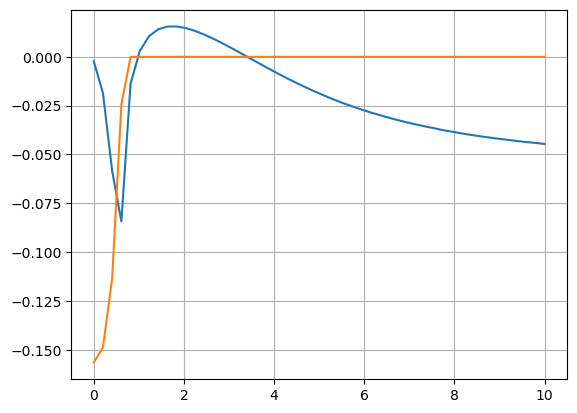

In [123]:
index = 40
(n_val, b_A_val, mu_A_val, V_A_val, K_AB_val,K_BA_val, K_CA_val) = turing_parameters2[index]
print(n_val, b_A_val, mu_A_val, V_A_val, K_AB_val,K_BA_val, K_CA_val)
plt.plot(ks, np.real(turing_dispersions2[index]))
plt.plot(ks, np.imag(turing_dispersions2[index]))
#plt.xlim([0,3])
#plt.ylim([-.2, 2])
plt.grid()

In [125]:
(n_val, b_A_val, mu_A_val, V_A_val, K_AB_val,K_BA_val, K_CA_val) = turing_parameters2[index]
n_val, b_A_val, mu_A_val, V_A_val, K_AB_val,K_BA_val, K_CA_val

(4, 0.001, 0.1, 5.0, 10.0, 10.0, 0.1)

In [24]:
import sys
from pathlib import Path
sys.path.append(f"{Path.home()}/morpho_repo/turing_codebase")
from pde_solvers.cn import *

In [138]:
model_128 = RD_2D_1st_Order(Ds=[D_A_val, D_B_val, 0], N=10*2500, T=10*100, Lx=10, Ly=10, 
                            Ix=100, Jy=100,
                        boundary_condition=Neumann_Boundary_2D
                       #boundary_condition=Periodic_Boundary_2D
                       # boundary_condition=Diritchlet_Boundary_2D
                       )

In [139]:
(n_val, b_A_val, mu_A_val, V_A_val, K_AB_val,K_BA_val, K_CA_val) = turing_parameters2[index]
def kinetics(A,B,C):    
    fA_v = b_A_val + V_A_val*act(B, K_BA_val, n_val)*inh(C, K_CA_val, n_val) - mu_A_val * A
    fB_v = b_A_val + V_A_val*inh(A, K_AB_val, n_val)*act(C, K_CA_val, n_val) - mu_A_val * B
    fC_v = b_A_val + V_A_val*inh(A, K_AB_val, n_val)*inh(B, K_BA_val, n_val)*act(C, K_CA_val, n_val) - mu_A_val * C
    return (fA_v, fB_v, fC_v)

A_star, B_star, C_star = valid_roots[turing_parameters_index2[index]]
print(A_star, B_star, C_star)
#A_128 = np.random.normal(scale=star_vals[Turing_indices[index], 0]*.1, size=(model_128.Ix*model_128.Jy))
A_128 = np.random.normal(scale=A_star*.1, size=(model_128.Ix*model_128.Jy))
A_128 += A_star
#B_128 = np.random.normal(scale=star_vals[Turing_indices[index], 1]*.1, size=(model_128.Ix*model_128.Jy))
B_128 = np.random.normal(scale=B_star*.1, size=(model_128.Ix*model_128.Jy))
B_128 += B_star
#C_128 = np.random.normal(scale=star_vals[Turing_indices[index], 2]*.1, size=(model_128.Ix*model_128.Jy))
C_128 = np.random.normal(scale=C_star*.1, size=(model_128.Ix*model_128.Jy))
C_128 += C_star

5.741047014212562 39.92073817838578 0.1665268656218546


In [140]:
res_128 = model_128.integrate([A_128,B_128,C_128],kinetics, 1)

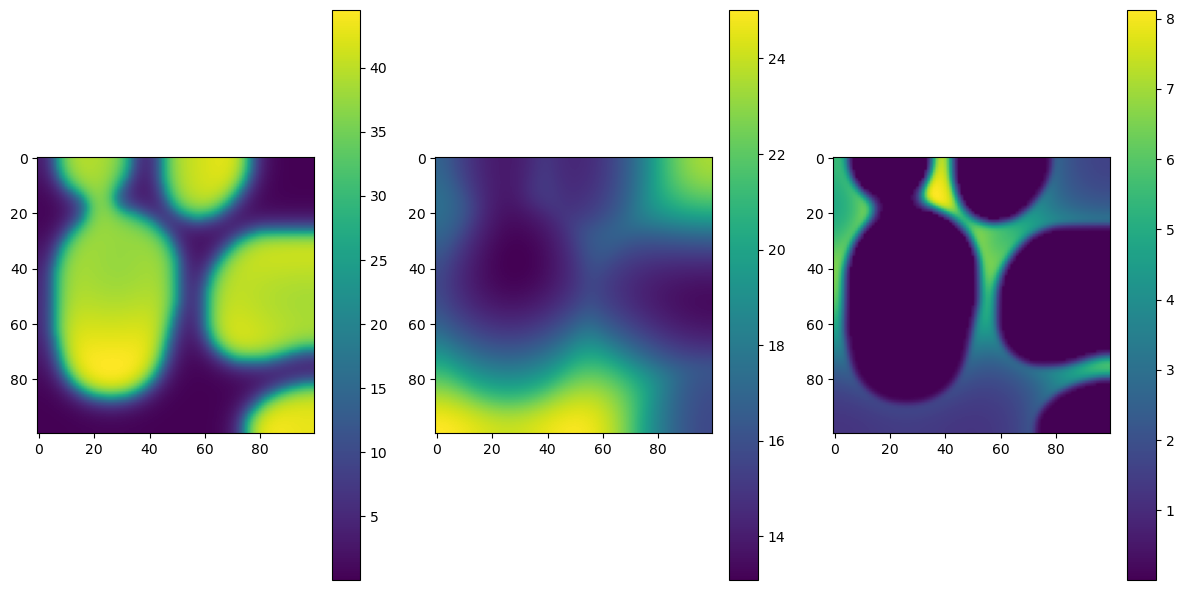

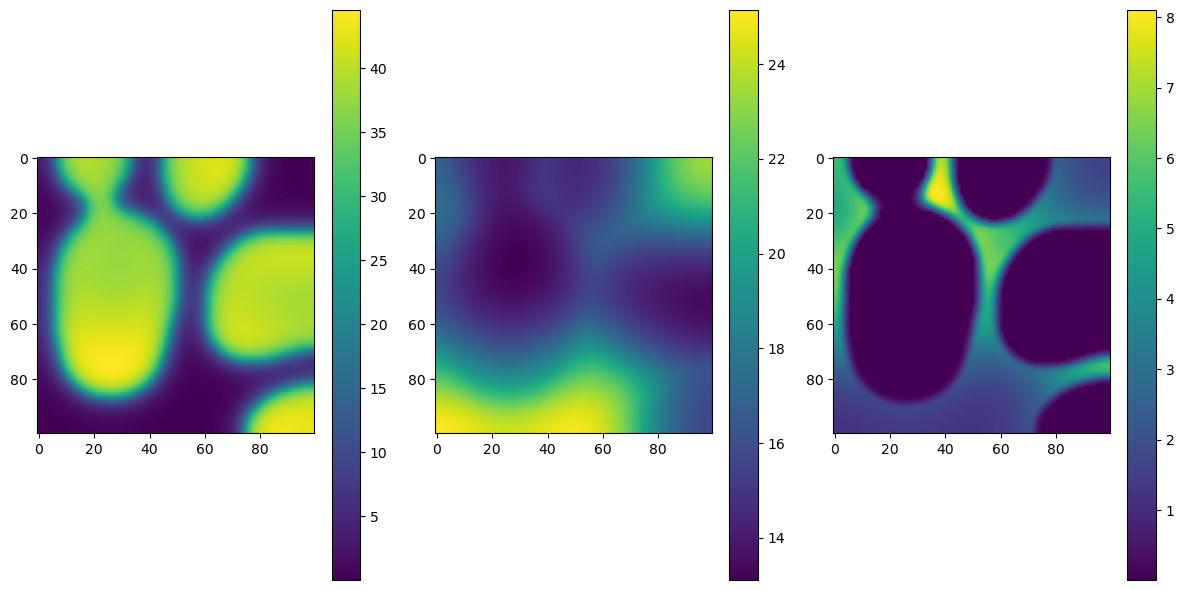

In [141]:
plt.figure(figsize=(12,6))
plt.subplot(131)
plt.imshow((res_128[-1, 0, :]).reshape(model_128.Ix, model_128.Jy))
plt.colorbar()
plt.subplot(132)
plt.imshow((res_128[-1, 1, :]).reshape(model_128.Ix, model_128.Jy))
plt.colorbar()
plt.subplot(133)
plt.imshow((res_128[-1, 2, :]).reshape(model_128.Ix, model_128.Jy))
plt.colorbar()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
plt.subplot(131)
plt.imshow((res_128[-500, 0, :]).reshape(model_128.Ix, model_128.Jy))
plt.colorbar()
plt.subplot(132)
plt.imshow((res_128[-500, 1, :]).reshape(model_128.Ix, model_128.Jy))
plt.colorbar()
plt.subplot(133)
plt.imshow((res_128[-500, 2, :]).reshape(model_128.Ix, model_128.Jy))
plt.colorbar()
plt.tight_layout()
plt.show()